# Go down to cell "CORRECT ONE"

In [40]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

import scipy as scp
import scipy.integrate as integrate
import scipy.special as special

Let's find some real looking numbers

<!-- in 1 gram of Uranium approx $N_U = 2.53 * 10^{21}$

Half life of Uranium-235: $ t_{1/2}( ^{235}U ) = 700 * 10^{6} $

And the decay $ ^{235}U \rightarrow  ^{231}T \rightarrow ^{231}Pa $ -->

| Element     | Atom        | Half-life $t_{1/2}$             |
| ----------- | ----------- | ------------------------------- |
| X           | $^{137m}Ba$ | $2.55 * 60 = 1.53 * 10^{2} s$                   |
| Y           | $^{137}La $ | $6*10^{10} * 365 * 24 * 3600 = 1.89 * 10^{18} s$ |
| Z           | $ ^{137}Ce$ | $ Stable $                      |

Assume we have 1 mg of $Ba$, then there would be $N = 4.396 * 10^{18}$ atoms

$ t_{ 1/2 } = \log_{2}^{-1} e^{\lambda} = \frac{ \ln(2)}{\lambda} $

$ \lambda = \frac{\ln(2)}{t_{ 1/2 }} $

In [41]:
atom_1 = r'$^{137m}Ba$'
atom_2 = r'$^{137}La $'
atom_3 = r'$^{137}Ce $'

t_1 = 1.53e2
t_2 = 1.89216e18

N_0 = 4.396e18
lambda_1 = np.log(2) / t_1
lambda_2 = np.log(2) / t_2
# lambda_3 = np.log(2) / t_3

### First attempt – Linear approx


\begin{equation}
    \begin{cases}
        N_{1} (t) = N_0 - \lambda_{1} e^{-\lambda_{1} t} t
        \\
        N_{2} (t) = \lambda_{1} N_0 e^{-\lambda_{1} t} t - \lambda_{2} N_0 e^{-\lambda_{2} t} t
        \\
        N_{3} (t) = \lambda_{2} N_0 e^{-\lambda_{2} t} t - \lambda_{3} N_0 e^{-\lambda_{3} t} t
    \end{cases}
    =
    \begin{cases}
        N_{1} (t) = N_0 ( 1 - \lambda_{1} e^{-\lambda_{1} t} t )
        \\
        N_{2} (t) = N_0 t ( \lambda_{1} e^{-\lambda_{1} t} - \lambda_{2} e^{-\lambda_{2} t} )
        \\
        N_{3} (t) = \lambda_{2} N_0 e^{-\lambda_{2} t} t - \lambda_{3} N_0 e^{-\lambda_{3} t} t
    \end{cases}
\end{equation}


<>:20: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
<>:20: SyntaxWarning: invalid escape sequence '\l'
<>:21: SyntaxWarning: invalid escape sequence '\l'
/var/folders/90/3hqj6r0s2hj9_zwj6y2dm0qm0000gn/T/ipykernel_22474/2948587119.py:20: SyntaxWarning: invalid escape sequence '\l'
  labels=[f'Atom 1 $\lambda_1 = {lambda_1}$',
/var/folders/90/3hqj6r0s2hj9_zwj6y2dm0qm0000gn/T/ipykernel_22474/2948587119.py:21: SyntaxWarning: invalid escape sequence '\l'
  f'Atom 2 $\lambda_2 = {lambda_2}$',


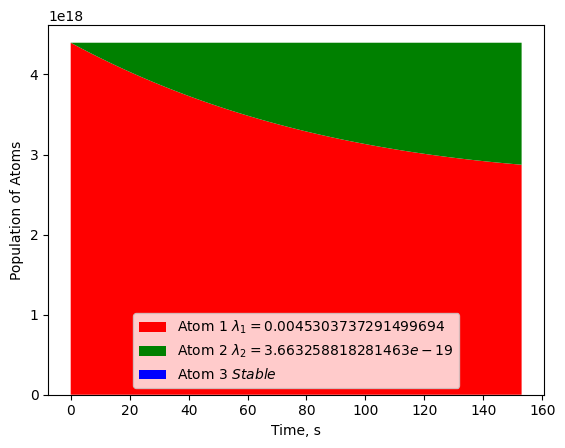

In [42]:
def population(t):
    N_t = [
        N_0 - ( (lambda_1*N_0) * np.exp(-lambda_1 * t) *t ),
        ( (lambda_1*N_0) * t * np.exp(-lambda_1 * t) ) - ( (lambda_2*N_0) * t * np.exp(-lambda_2 * t) ),
        (lambda_2*N_0) * t * np.exp(-lambda_2 * t)
    ]
    return N_t

end_time = 1.89216e18

time_values = np.linspace(0, t_1, 10**5)
populations = np.array([population(t) for t in time_values])

# plt.plot(time_values, populations[:, 0], color="red", label=f'Atom 1, $\lambda_1 = {lambda_1}$')
# plt.plot(time_values, populations[:, 1], color="green", label=f'Atom 2 $\lambda_2 = {lambda_2}$')
# plt.plot(time_values, populations[:, 2], color="blue", label='Atom 3 $Stable$')

plt.stackplot(time_values,
                populations.T,
                labels=[f'Atom 1 $\lambda_1 = {lambda_1}$',
                        f'Atom 2 $\lambda_2 = {lambda_2}$',
                        f'Atom 3 $Stable$'],
                colors=['red', 'green', 'blue'])

# plt.yscale('log')
# plt.ylim( 0.9*N_0, 1.01*N_0 )
# plt.xscale('log')
plt.xlabel('Time, s')
plt.ylabel('Population of Atoms')
plt.legend()
plt.show()

### Test: 1 atom as ODE

<>:15: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\l'
/var/folders/90/3hqj6r0s2hj9_zwj6y2dm0qm0000gn/T/ipykernel_22474/4005905346.py:15: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(time_values, populations, color="red", label=f'Atom 1, $\lambda_1 = {lambda_1}$')


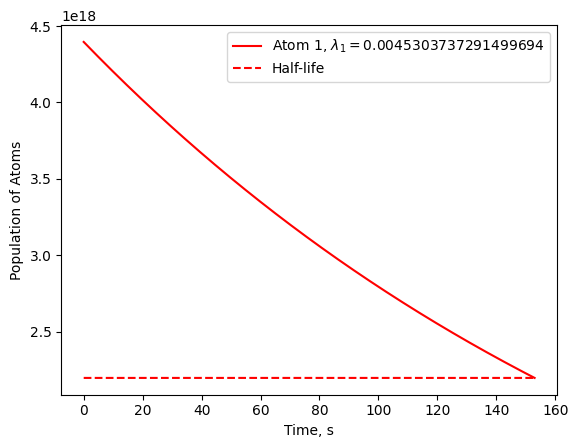

In [44]:
t_1 = 1.53e2
t_2 = 1.89216e18

N_0 = 4.396e18
lambda_1 = np.log(2) / t_1

def population(t):
    N_t = N_0 * np.exp(-lambda_1 * t)
    return N_t

end_time = 1.53e2

time_values = np.linspace(0, end_time, 10**5)
populations = np.array([population(t) for t in time_values])
plt.plot(time_values, populations, color="red", label=f'Atom 1, $\lambda_1 = {lambda_1}$')
plt.plot(time_values, N_0/2 * np.ones_like(time_values), 'r--', label='Half-life')
plt.xlabel('Time, s')
plt.ylabel('Population of Atoms')
plt.legend()
plt.show()

### CORRECT ONE: Full ODEs

to solve as ODE

\begin{equation}
    \dot{\textbf{N}} (t)
    =
    N_{0}
    \begin{cases}
        - \lambda_{1} e^{-\lambda_{1} t}
        \\
        \lambda_{1} e^{-\lambda_{1} t} - \lambda_{2} e^{-\lambda_{2} t}
        \\
        \lambda_{2} e^{-\lambda_{2} t}
    \end{cases}
\end{equation}

\begin{equation}
    \textbf{N} (t = 0)
    =
    \begin{cases}
        N_0
        \\
        0
        \\
        0
    \end{cases}
\end{equation}

/var/folders/90/3hqj6r0s2hj9_zwj6y2dm0qm0000gn/T/ipykernel_22474/4142802591.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


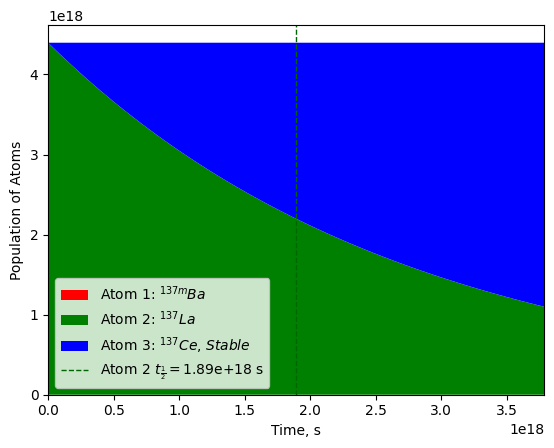

In [ ]:
end_time = 2*t_2

y0 = [N_0, 0, 0] # initial condition
def dn_dt(N, t): # ODE system
    dN1_dt = -lambda_1 * N[0]
    dN2_dt = lambda_1 * N[0] - lambda_2 * N[1]
    dN3_dt = lambda_2 * N[1]
    return [dN1_dt, dN2_dt, dN3_dt]

time_values = np.linspace(0, end_time, 10**6)
populations_ode = integrate.odeint(dn_dt, y0, time_values) # SciPy ODE solver

fig, ax = plt.subplots()
ax.stackplot(time_values,
                populations_ode.T,
                labels=[f'Atom 1: {atom_1}', # $\lambda_1 = {lambda_1:.2e}$
                        f'Atom 2: {atom_2}', #$\lambda_2 = {lambda_2:.2e}$
                        f'Atom 3: {atom_3}, $Stable$'],
                colors=['red', 'green', 'blue'])


ax.set_xlim(0, end_time)
ax.axvline(x=t_1, color='darkred', linestyle='--', linewidth=1,
           label=r'Atom 1 $ t_{\frac{1}{2}} = $'+f'{t_1:.2e} s')
ax.axvline(x=t_2, color='darkgreen', linestyle='--', linewidth=1,
           label=r'Atom 2 $t_{\frac{1}{2}} = $'+f'{t_2:.2e} s')
ax.set_xlabel('Time, s')
ax.set_ylabel('Population of Atoms')
ax.legend(loc='best')

fig.show()

/var/folders/90/3hqj6r0s2hj9_zwj6y2dm0qm0000gn/T/ipykernel_22474/2845619748.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


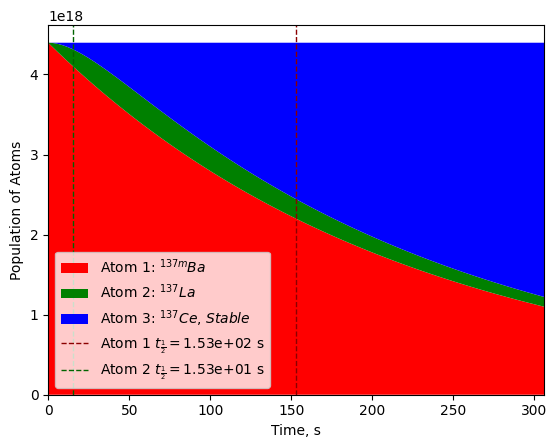

In [ ]:
t_1 = 1.53e2
t_2 = t_1/10

lambda_1 = np.log(2) / t_1
lambda_2 = np.log(2) / t_2

end_time = 2*t_1

y0 = [N_0, 0, 0] # initial condition
def dn_dt(N, t): # ODE system
    dN1_dt = -lambda_1 * N[0]
    dN2_dt = lambda_1 * N[0] - lambda_2 * N[1]
    dN3_dt = lambda_2 * N[1]
    return [dN1_dt, dN2_dt, dN3_dt]

time_values = np.linspace(0, end_time, 10**6)
populations_ode = integrate.odeint(dn_dt, y0, time_values) # SciPy ODE solver

fig, ax = plt.subplots()
ax.stackplot(time_values,
                populations_ode.T,
                labels=[f'Atom 1: {atom_1}', # $\lambda_1 = {lambda_1:.2e}$
                        f'Atom 2: {atom_2}', #$\lambda_2 = {lambda_2:.2e}$
                        f'Atom 3: {atom_3}, $Stable$'],
                colors=['red', 'green', 'blue'])


ax.set_xlim(0, end_time)
ax.axvline(x=t_1, color='darkred', linestyle='--', linewidth=1,
           label=r'Atom 1 $ t_{\frac{1}{2}} = $'+f'{t_1:.2e} s')
ax.axvline(x=t_2, color='darkgreen', linestyle='--', linewidth=1,
           label=r'Atom 2 $t_{\frac{1}{2}} = $'+f'{t_2:.2e} s')
ax.set_xlabel('Time, s')
ax.set_ylabel('Population of Atoms')
ax.legend(loc='best')

fig.show()